In [1]:
import tensorflow as tf

print(tf.__version__)

2.3.0


In [2]:
# Carga de los datos a usar

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# X: Son los datos de imagenes.
# Y: Son los datos en digital.

# print(x_train[0])  # Como estan codificados los datos?

11493376/11490434 [==============================] - 3s 0us/step


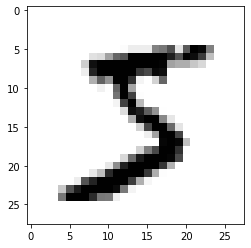

In [3]:
# Visualizar los datos a utilizar

import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [4]:
print(y_train[0])

5


In [5]:
# Estandarización de los datos.

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

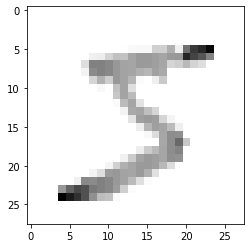

In [6]:
# Resultados despues de la estandarizacion

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [8]:
# Diseño del modelo

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2611 - accuracy: 0.9248
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1065 - accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0720 - accuracy: 0.9778


In [9]:
# Valores de precisión y exactitud ("loss")

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1031 - accuracy: 0.9678
0.10306476056575775
0.9678000211715698


In [10]:
# Guardar el modelo

model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [22]:
# Ejecucion del modelo para predecir.
predictions = new_model.predict(x_test)

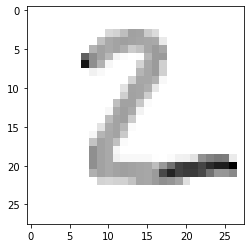

In [18]:
# Datos predecidos.

import numpy as np

PredictionValue = 1

plt.imshow(x_test[PredictionValue],cmap=plt.cm.binary)
plt.show()

In [19]:
# Resultado de la predicción

print(np.argmax(predictions[PredictionValue]))

2
